In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airlines-flights-data/airlines_flights_data.csv


In [2]:
df =pd.read_csv('/kaggle/input/airlines-flights-data/airlines_flights_data.csv')
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.shape

(300153, 12)

In [4]:
df.isnull().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [7]:
categorials_cols=['airline', 'flight', 'source_city', 'departure_time','stops', 'arrival_time', 'destination_city', 'class']
for col in  categorials_cols:
    print(df[col].value_counts())

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64
flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: count, Length: 1561, dtype: int64
source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64
departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64
stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64
arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64
destination_city


In [8]:
#Q-1
airline_counts=df['airline'].value_counts()
print(airline_counts)

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64


**Visualize the data**

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

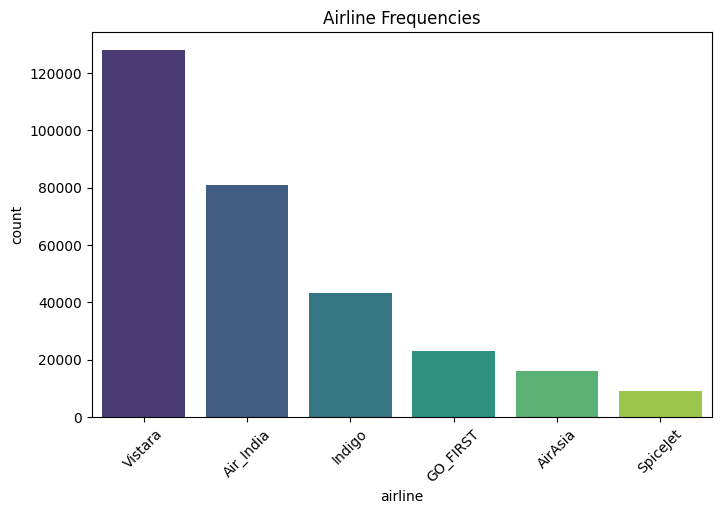

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x='airline',data=df,order=airline_counts.index,palette='viridis')
plt.xticks(rotation=45)
plt.title('Airline Frequencies')
plt.show()

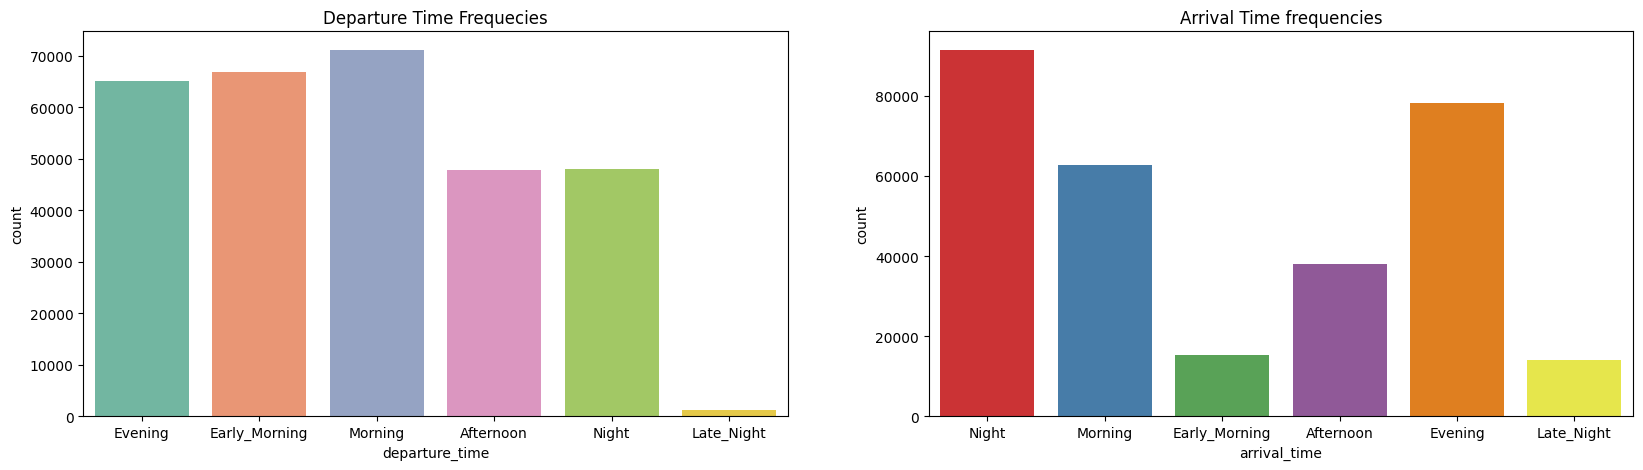

In [11]:
#Q-2 compare the distribuiton of departure and arrival time 
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x='departure_time',data=df,palette='Set2')
plt.title('Departure Time Frequecies')

plt.subplot(1,2,2)
sns.countplot(x='arrival_time',data=df,palette='Set1')
plt.title('Arrival Time frequencies')
plt.show()

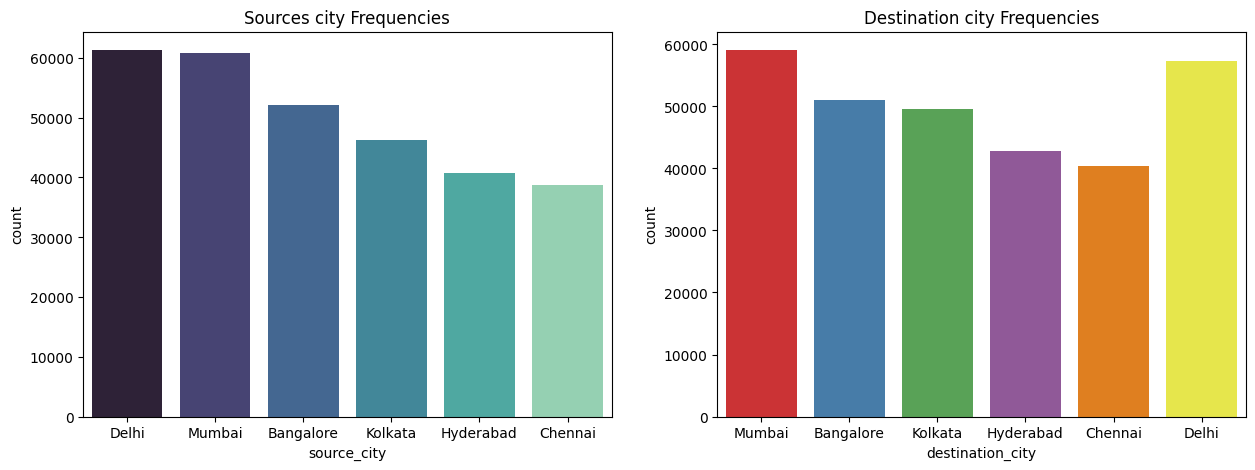

In [12]:
#Q-3 source city and destination city 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x='source_city',data=df,palette='mako')
plt.title('Sources city Frequencies')

plt.subplot(1,2,2)
sns.countplot(x='destination_city',data=df,palette='Set1')
plt.title('Destination city Frequencies')
plt.show()

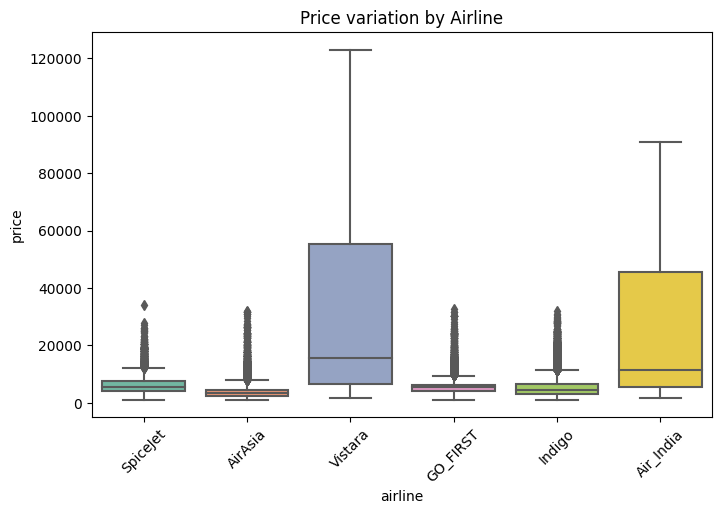

In [13]:
#Q-4 does price vary with airlines
plt.figure(figsize=(8,5))
sns.boxplot(x='airline',y='price',data=df,palette='Set2')
plt.xticks(rotation=45)
plt.title('Price variation by Airline')
plt.show()

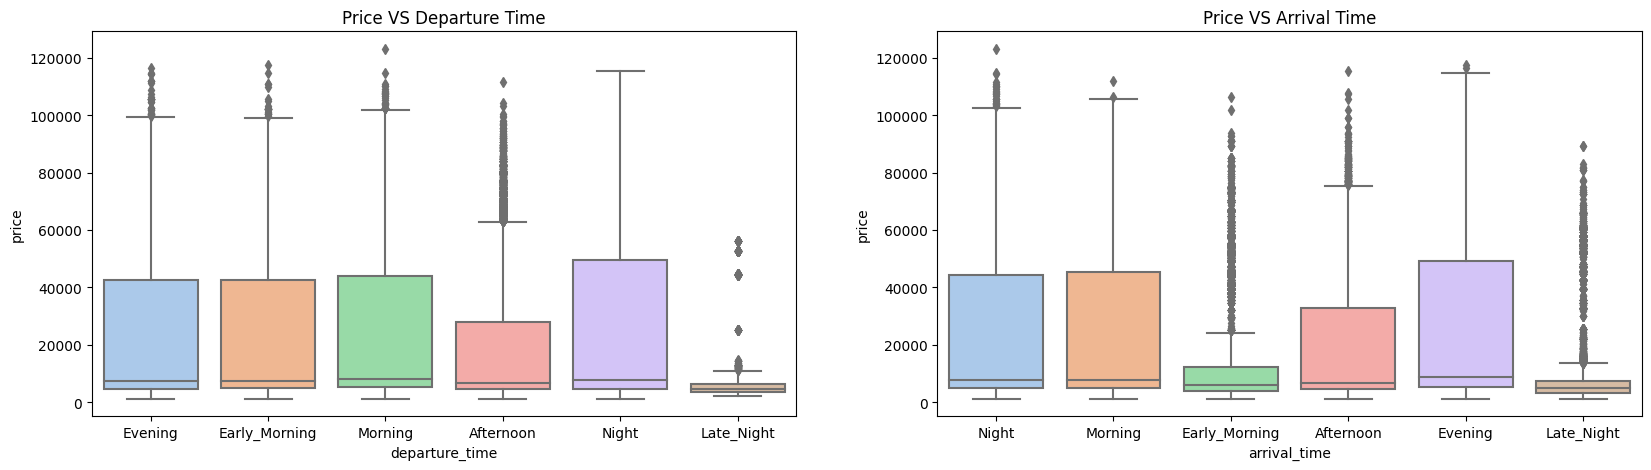

In [14]:
#Q-5 how price changes based on departure and arrival time
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df,palette='pastel')
plt.title('Price VS Departure Time')


plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='pastel')
plt.title('Price VS Arrival Time')
plt.show()

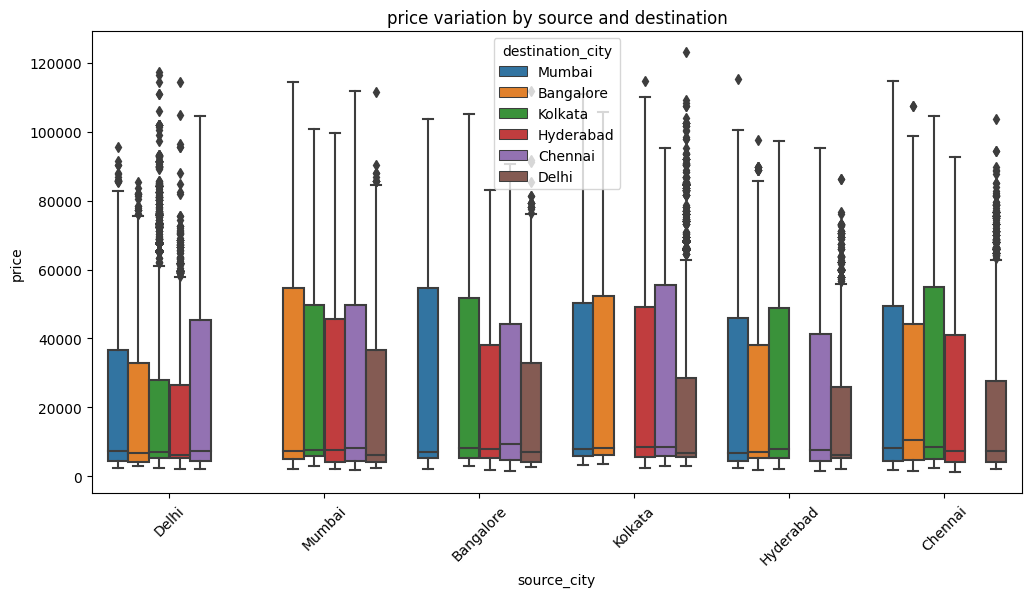

In [15]:
#Q-6: how price change with source and destination 
plt.figure(figsize=(12,6))
sns.boxplot(x='source_city',y='price',hue='destination_city',data=df)
plt.title('price variation by source and destination')
plt.xticks(rotation=45)
plt.show()

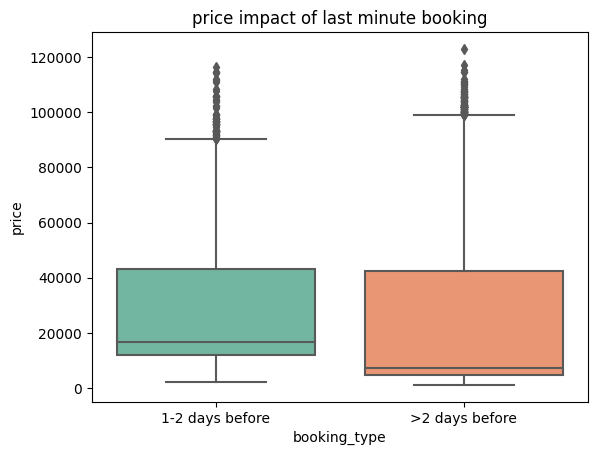

avg price(1-2 days before): 27421.169326390056
avg price(>2 days before): 20757.498484024472


In [16]:
#Q-7: price impact when buying tickets 1-2 days before departure
# Create a new column for booking type
df['booking_type']=df['days_left'].apply(lambda x:'1-2 days before' if x<=2 else '>2 days before')

#Boxplot 
sns.boxplot(x='booking_type',y='price',data=df,palette='Set2')
plt.title('price impact of last minute booking')
plt.show()

#price average
last_minute=df[df['days_left']<=2]
others=df[df['days_left']>2]

print('avg price(1-2 days before):',last_minute['price'].mean())
print('avg price(>2 days before):',others['price'].mean())

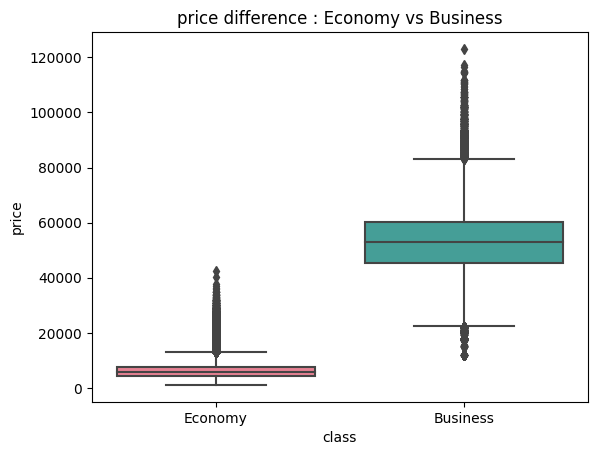

In [17]:
#Q-8: Price variation between economy and business
sns.boxplot(x='class',y='price',data=df,palette='husl')
plt.title('price difference : Economy vs Business')
plt.show()

In [18]:
#Q-9: Average price of vistara from delhi -hyderabad(business class)
vistara_df=df[(df['airline'] == 'Vistara') &
                (df['source_city'] == 'Delhi') &
                (df['destination_city'] == 'Hyderabad') &
                (df['class'] == 'Business')]

avg_price=vistara_df['price'].mean()
print('average price:',avg_price)

average price: 47939.840361445786


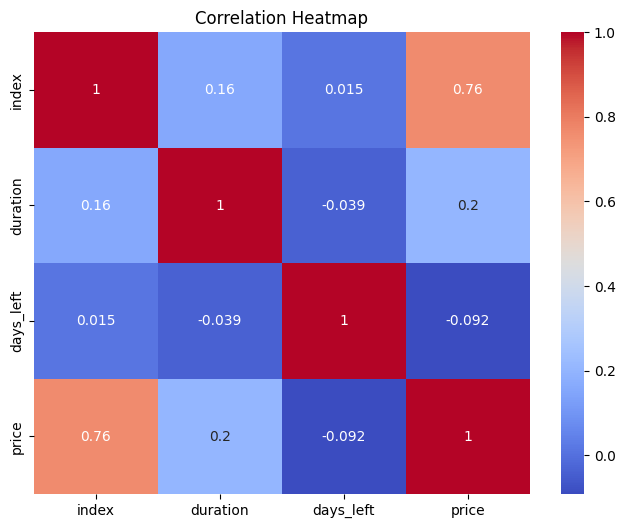

In [19]:
plt.figure(figsize=(8,6))
corr=df.corr(numeric_only=True)
sns.heatmap(corr, annot=True,cmap='coolwarm', fmt='.2g')
plt.title('Correlation Heatmap')
plt.show()


In [20]:
df.drop(columns=['flight','booking_type'],inplace=True)


In [21]:
df=pd.get_dummies(df,columns=['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class'],drop_first=True)
df.head()

,index,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,0,2.17,1,5953,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,True
1,1,2.33,1,5953,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,True
2,2,2.17,1,5956,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,3,2.25,1,5955,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True
4,4,2.33,1,5955,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,True,True


In [22]:
x=df.drop('price',axis=1)
y=df['price']

**Split the data**

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [24]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((240122, 31), (60031, 31), (240122,), (60031,))

**BULID MODEL**

**Linear Regression**

In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

print('Mean absolute error...for Train:',mean_absolute_error(y_train,y_pred_train))
print('Mean absolute error...for Test:',mean_absolute_error(y_test,y_pred_test))

print('Mean squared error.....for Train:',mean_squared_error(y_train,y_pred_train))
print('Mean squared error.....for Test:',mean_squared_error(y_test,y_pred_test))

print('r2 score for Train:',r2_score(y_train,y_pred_train))
print('r2 score for Test:',r2_score(y_test,y_pred_test))

Mean absolute error...for Train: 4553.990035706108
Mean absolute error...for Test: 4536.404234009155
Mean squared error.....for Train: 45225080.83189447
Mean squared error.....for Test: 45386562.45484566
r2 score for Train: 0.91220358741818
r2 score for Test: 0.911953204247708


**Polynomial Features**

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [28]:
poly=PolynomialFeatures(degree=2,include_bias=False)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

In [29]:
lr_poly=LinearRegression()
lr_poly.fit(x_train_poly,y_train)

LinearRegression()

In [30]:
y_train_pred = lr_poly.predict(x_train_poly)
y_test_pred = lr_poly.predict(x_test_poly)

print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

Train MAE: 3076.812745596422
Test MAE: 3104.1799703116053
Train MSE: 23415959.213466838
Test MSE: 24163577.655123487
Train R²: 0.9545420996869783
Test R²: 0.9531243286256379


**Model:-Random Forest**

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [33]:
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

Train MAE: 350.2412098433296
Test MAE: 950.908902567007
Train MSE: 844936.4867065013
Test MSE: 6208014.402601664
Train R²: 0.9983597068036637
Test R²: 0.9879568809231376


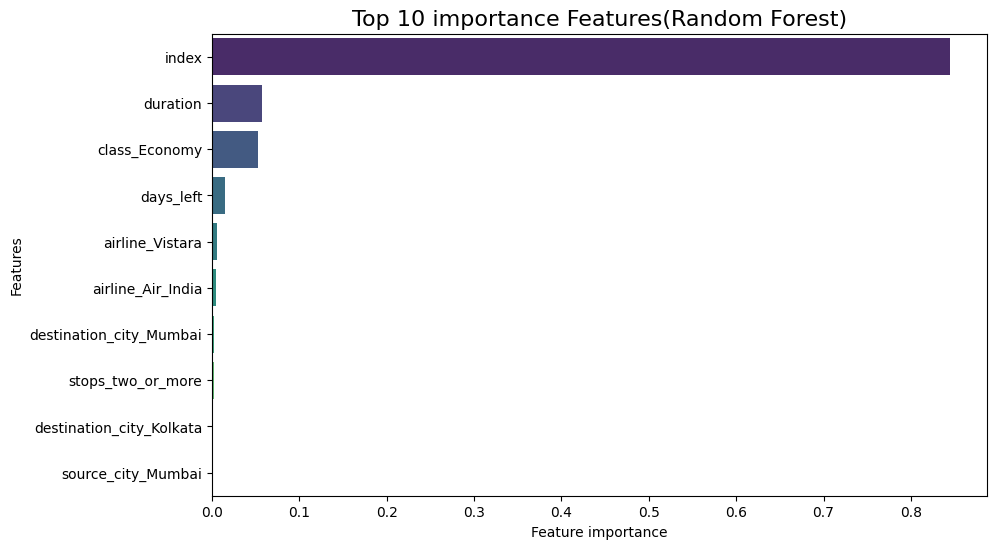

In [34]:
#check feature importance 
importances=pd.Series(rf.feature_importances_,index=x_train.columns)
top_features=importances.sort_values(ascending=False).head(10)


#plot 
plt.figure(figsize=(10,6))
sns.barplot(x=top_features.values,y=top_features.index,palette='viridis')
plt.title('Top 10 importance Features(Random Forest)',fontsize=16)
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.show()

In [35]:
from xgboost import XGBRegressor

xgb= XGBRegressor(

 n_estimators=100,     # number of trees
    learning_rate=0.1,   # step size shrinkage
    max_depth=20,          # depth of each tree
    subsample=0.8,        # % of training data for each tree
    colsample_bytree=0.8, # % of features per tree
    random_state=42,
    reg_alpha=1,        # L1 regularization (lasso-like)
    reg_lambda=1,       # L2 regularization (ridge-like))
)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [36]:
y_train_pred = xgb.predict(x_train)
y_test_pred = xgb.predict(x_test)

print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

Train MAE: 340.7595185277074
Test MAE: 1094.3773776147461
Train MSE: 773355.2118575708
Test MSE: 6472909.599915235
Train R²: 0.9984986690570011
Test R²: 0.9874430025399304


In [37]:
data={
    'Model': ['Linear Regression', 'Polynomial Regression', 'Random Forest', 'XGBoost'],
    'Train MAE': [4553.99, 3076.81, 350.03, 340.76],
    'Test MAE': [4536.40, 3104.18, 948.18, 1094.38],
    'Train R²': [0.9122, 0.9545, 0.9984, 0.9985],
    'Test R²': [0.9119, 0.9531, 0.9881, 0.9874]

}
df_comp=pd.DataFrame(data)

**Visualize MAE**

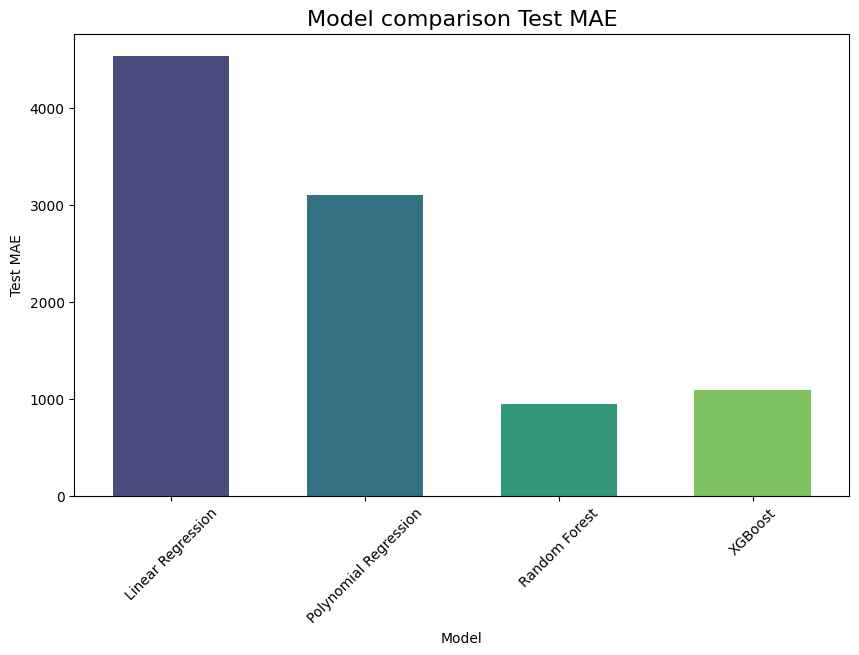

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(x='Model',y='Test MAE',data=df_comp,palette='viridis', width=0.6)
plt.title('Model comparison Test MAE',fontsize=16)
plt.ylabel('Test MAE')
plt.xticks(rotation=45)
plt.show()

**Visualize R²**

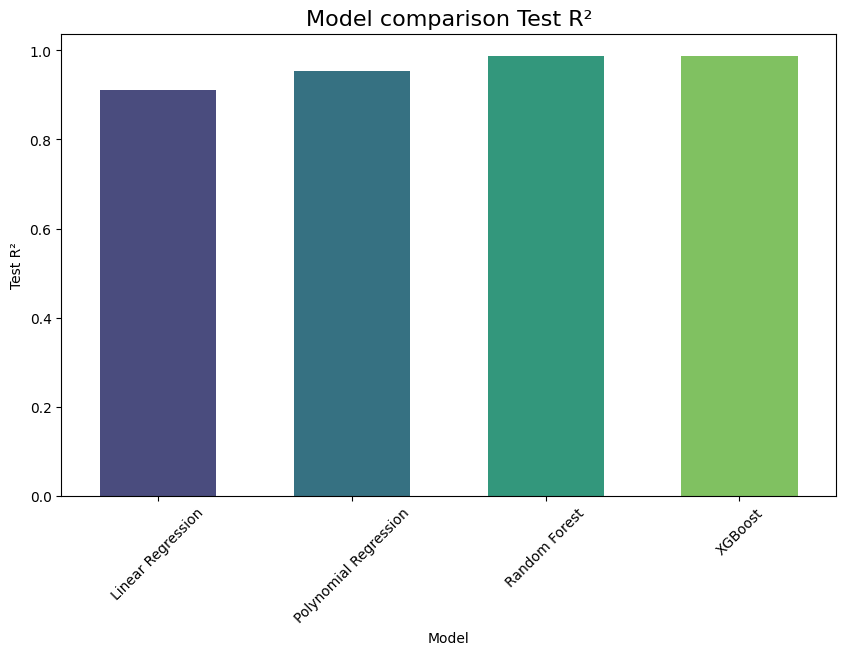

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(x='Model',y='Test R²',data=df_comp,palette='viridis', width=0.6)
plt.title('Model comparison Test R²',fontsize=16)
plt.ylabel('Test R²')
plt.xticks(rotation=45)
plt.show()

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# R² scores for each model
data = {
    'Model': ['Linear Regression', 'Polynomial Regression', 'Random Forest', 'XGBoost'],
    'Train R²': [0.9122, 0.9545, 0.9984, 0.9985],
    'Test R²': [0.9119, 0.9531, 0.9881, 0.9874]
}

df_comp= pd.DataFrame(data)


In [41]:
df_melt = df_comp.melt(id_vars='Model', value_vars=['Train R²', 'Test R²'],
                     var_name='Dataset', value_name='R² Score')


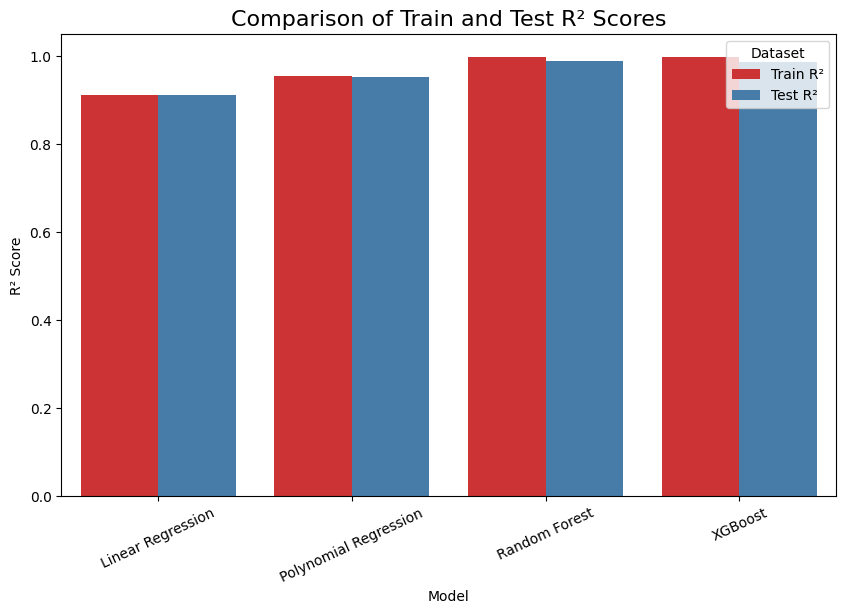

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='R² Score', hue='Dataset', data=df_melt, palette='Set1')
plt.title('Comparison of Train and Test R² Scores', fontsize=16)
plt.ylim(0, 1.05)
plt.xticks(rotation=25)
plt.ylabel('R² Score')
plt.legend(title='Dataset')
plt.show()
